## HR Data Exploration - A look at employee satisfaction scores based on job title
data: https://www.kaggle.com/datasets/mexwell/employee-performance-and-productivity-data

This dataset contains 100,000 rows of data capturing key aspects of employee performance, productivity, and demographics in a corporate environment. It includes details related to the employee's job, work habits, education, performance, and satisfaction. The dataset is designed for various purposes such as HR analytics, employee churn prediction, productivity analysis, and performance evaluation.

- Employee_ID: Unique identifier for each employee.
Department: The department in which the employee works (e.g., Sales, HR, IT).
- Gender: Gender of the employee (Male, Female, Other).
- Age: Employee's age (between 22 and 60).
- Job_Title: The role held by the employee (e.g., Manager, Analyst, Developer).
- Hire_Date: The date the employee was hired.
- Years_At_Company: The number of years the employee has been working for the company.
Education_Level: Highest educational qualification (High School, Bachelor, Master, PhD).
- Performance_Score: Employee's performance rating (1 to 5 scale).
- Monthly_Salary: The employee's monthly salary in USD, correlated with job title and performance score.
- Work_Hours_Per_Week: Number of hours worked per week.
- Projects_Handled: Total number of projects handled by the employee.
- Overtime_Hours: Total overtime hours worked in the last year.
- Sick_Days: Number of sick days taken by the employee.
- Remote_Work_Frequency: Percentage of time worked remotely (0%, 25%, 50%, 75%, 100%).
- Team_Size: Number of people in the employee's team.
- Training_Hours: Number of hours spent in training.
- Promotions: Number of promotions received during their tenure.
- Employee_Satisfaction_Score: Employee satisfaction rating (1.0 to 5.0 scale).
- Resigned: Boolean value indicating if the employee has resigned.

#### Quick look at the data

In [250]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [251]:
data = pd.read_csv('Extended_Employee_Performance_and_Productivity_Data.csv')
data.head()

,Employee_ID,Department,Gender,Age,Job_Title,Hire_Date,Years_At_Company,Education_Level,Performance_Score,Monthly_Salary,Work_Hours_Per_Week,Projects_Handled,Overtime_Hours,Sick_Days,Remote_Work_Frequency,Team_Size,Training_Hours,Promotions,Employee_Satisfaction_Score,Resigned
0,1,IT,Male,55,Specialist,2022-01-19 08:03:05.556036,2,High School,5,6750.0,33,32,22,2,0,14,66,0,2.63,False
1,2,Finance,Male,29,Developer,2024-04-18 08:03:05.556036,0,High School,5,7500.0,34,34,13,14,100,12,61,2,1.72,False
2,3,Finance,Male,55,Specialist,2015-10-26 08:03:05.556036,8,High School,3,5850.0,37,27,6,3,50,10,1,0,3.17,False
3,4,Customer Support,Female,48,Analyst,2016-10-22 08:03:05.556036,7,Bachelor,2,4800.0,52,10,28,12,100,10,0,1,1.86,False
4,5,Engineering,Female,36,Analyst,2021-07-23 08:03:05.556036,3,Bachelor,2,4800.0,38,11,29,13,100,15,9,1,1.25,False


In [252]:
# intial cleaning and organization of data 
data.columns = data.columns.str.lower()
data = data.drop(columns=['hire_date']) # does not add any value to the analysis
filtered_data = data[data['years_at_company'] >= 1] # want to look at employees who have been working for at least 1 year

In [273]:
filtered_data.describe(include = 'number').T


,count,mean,std,min,25%,50%,75%,max
employee_id,89917.0,49953.024511,28869.662944,1.0,24969.00,49923.0,74944.00,99999.0
age,89917.0,41.024322,11.248201,22.0,31.00,41.0,51.00,60.0
years_at_company,89917.0,4.978002,2.580249,1.0,3.00,5.0,7.00,10.0
performance_score,89917.0,2.995496,1.414659,1.0,2.00,3.0,4.00,5.0
monthly_salary,89917.0,6403.395353,1372.628191,3850.0,5250.00,6500.0,7500.00,9000.0
work_hours_per_week,89917.0,44.948886,8.948067,30.0,37.00,45.0,53.00,60.0
projects_handled,89917.0,24.441852,14.465205,0.0,12.00,24.0,37.00,49.0
overtime_hours,89917.0,14.507312,8.667026,0.0,7.00,15.0,22.00,29.0
sick_days,89917.0,7.005639,4.330131,0.0,3.00,7.0,11.00,14.0
remote_work_frequency,89917.0,50.036422,35.366820,0.0,25.00,50.0,75.00,100.0


In [254]:
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 89917 entries, 0 to 99998
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   employee_id                  89917 non-null  int64  
 1   department                   89917 non-null  object 
 2   gender                       89917 non-null  object 
 3   age                          89917 non-null  int64  
 4   job_title                    89917 non-null  object 
 5   years_at_company             89917 non-null  int64  
 6   education_level              89917 non-null  object 
 7   performance_score            89917 non-null  int64  
 8   monthly_salary               89917 non-null  float64
 9   work_hours_per_week          89917 non-null  int64  
 10  projects_handled             89917 non-null  int64  
 11  overtime_hours               89917 non-null  int64  
 12  sick_days                    89917 non-null  int64  
 13  remote_work_frequency

#### Average Employee Satisfaction Rating Based On Department And Job Title

In [255]:
filtered_data.groupby('department').agg({'employee_satisfaction_score': 'mean'}).sort_values(by='employee_satisfaction_score', ascending=False)

,employee_satisfaction_score
department,
IT,3.026277
Operations,3.024335
Finance,3.004945
Engineering,3.002304
Marketing,2.992131
HR,2.988945
Sales,2.988664
Legal,2.987357
Customer Support,2.968950


In [256]:
filtered_data.groupby('job_title').agg({'employee_satisfaction_score': 'mean'}).sort_values(by='employee_satisfaction_score', ascending=False)

,employee_satisfaction_score
job_title,
Consultant,3.010722
Specialist,3.008176
Analyst,2.999281
Manager,2.994010
Developer,2.993697
Engineer,2.991886
Technician,2.989696


#### Average Performance Score Based On Department And Job Title

In [257]:
filtered_data.groupby(['department']).agg({'performance_score': 'mean'}).sort_values(by='performance_score', ascending=False)

,performance_score
department,
Engineering,3.020659
Operations,3.008822
IT,3.005606
Customer Support,2.998104
Sales,2.997095
HR,2.993629
Legal,2.982055
Finance,2.978838
Marketing,2.975206


In [258]:
filtered_data.groupby('job_title').agg({'performance_score': 'mean'}).sort_values(by='performance_score', ascending=False)

,performance_score
job_title,
Consultant,3.011518
Specialist,3.008331
Engineer,2.998983
Manager,2.992317
Developer,2.988062
Technician,2.987743
Analyst,2.981332


Notes: 
- Consultants had the highest performance scores and also posted the highest employee satisfaction
- Analysts scored low on performance scores yet pretty high in employee statisfaction
- The averages do not differ much 
- Do performance scores and employee satisfaction score have any relationship?


#### Deeper Dive Into Consulting
##### Consultants ranked highest in both performance scores and employee satisfaction (on average)

In [259]:
consulting_data = filtered_data[filtered_data['job_title'] == 'Consultant']
consulting_data.head()

,employee_id,department,gender,age,job_title,years_at_company,education_level,performance_score,monthly_salary,work_hours_per_week,projects_handled,overtime_hours,sick_days,remote_work_frequency,team_size,training_hours,promotions,employee_satisfaction_score,resigned
9,10,Engineering,Female,45,Consultant,7,Bachelor,1,6050.0,41,33,2,6,75,4,53,2,2.93,False
23,24,Sales,Male,58,Consultant,6,Master,2,6600.0,55,2,28,8,25,6,78,2,4.26,False
30,31,Customer Support,Male,58,Consultant,6,Bachelor,1,6050.0,38,15,25,2,50,12,16,2,4.65,False
37,38,Sales,Other,46,Consultant,9,Master,2,6600.0,31,6,15,7,0,2,48,0,2.47,False
50,51,Legal,Female,35,Consultant,4,Bachelor,1,6050.0,55,26,29,4,100,2,28,1,3.02,False


In [260]:
consulting_data.groupby('department').agg({'performance_score': 'mean'}).sort_values(by='performance_score', ascending=False)

,performance_score
department,
HR,3.064673
IT,3.061367
Operations,3.053221
Customer Support,3.024373
Legal,3.009749
Sales,3.000701
Finance,2.989101
Marketing,2.950437
Engineering,2.945055


In [261]:
consulting_data.groupby('department').agg({
    'employee_satisfaction_score':'mean',
    'performance_score': 'mean',
    'remote_work_frequency':'mean', 
    'monthly_salary': 'mean',
    'work_hours_per_week': 'mean',
    'promotions':'mean'
    }).sort_values(by='employee_satisfaction_score', ascending=False)

,employee_satisfaction_score,performance_score,remote_work_frequency,monthly_salary,work_hours_per_week,promotions
department,,,,,,
Finance,3.045647,2.989101,50.749319,7144.005450,44.951635,0.985695
Operations,3.044412,3.053221,51.032913,7179.271709,44.612045,1.036415
Engineering,3.036645,2.945055,50.897436,7119.780220,44.885714,0.975092
IT,3.032287,3.061367,49.232915,7183.751743,45.309623,0.956067
Sales,3.019881,3.000701,50.192712,7150.385424,45.111423,1.014015
Marketing,3.000948,2.950437,48.815598,7122.740525,44.945335,0.948251
Legal,2.999526,3.009749,51.305710,7155.362117,45.082173,1.025766
HR,2.998220,3.064673,47.340056,7185.570236,44.953408,0.970793
Customer Support,2.916609,3.024373,50.913978,7163.405018,44.974194,1.007168


- Consultants in HR are (on average) recieving the highest performance scores but giving some of the lowest employee satisfaction scores. This is interesting. We can also see that consulants in HR work the fewest amount of hours remotely compared to other consultants. Does this impact the satisfaction or performance score?
- (based on avg performance score) top two departments, HR and IT are paid the most & bottom two departments, Marketing and Engineering are paid the least. Looks to be a relationship between performance scores and monthly salary
- IT and HR have the second and third lowest average number of promtions, last place being Marketing. I would think that the performance scores would have a stronger relationship to the number of promotions 
- Customer Support posts the lowest employee satisfaction score yet does pretty well in terms of performance scores. Why? 

#### Deeper Dive Into Technicians
##### Technicians posted the second lowest performance score and the lowest employee satisfaction score (on average)

In [262]:
tech_data = filtered_data[filtered_data['job_title'] == 'Technician']
tech_data.head()

,employee_id,department,gender,age,job_title,years_at_company,education_level,performance_score,monthly_salary,work_hours_per_week,projects_handled,overtime_hours,sick_days,remote_work_frequency,team_size,training_hours,promotions,employee_satisfaction_score,resigned
6,7,IT,Male,37,Technician,1,Bachelor,5,5250.0,55,20,29,2,0,16,27,0,4.46,False
8,9,Marketing,Female,55,Technician,1,High School,2,4200.0,51,23,21,14,0,1,0,1,1.44,False
11,12,Customer Support,Male,27,Technician,9,Bachelor,5,5250.0,39,13,2,13,25,5,88,0,1.96,False
12,13,HR,Male,51,Technician,5,Bachelor,4,4900.0,31,11,16,1,75,7,17,2,2.13,False
19,20,Finance,Male,23,Technician,9,High School,2,4200.0,52,0,9,1,0,5,66,0,3.91,False


In [263]:
tech_data.groupby('department').agg({'performance_score': 'mean'}).sort_values(by='performance_score', ascending=False)

,performance_score
department,
Engineering,3.095626
Sales,3.007885
Operations,2.990476
Legal,2.985704
Finance,2.977747
HR,2.968188
IT,2.967556
Marketing,2.958716
Customer Support,2.944961


In [264]:
tech_data.groupby('department').agg({
    'employee_satisfaction_score':'mean',
    'performance_score': 'mean',
    'remote_work_frequency':'mean', 
    'monthly_salary': 'mean',
    'work_hours_per_week': 'mean',
    'promotions':'mean',
    'employee_id':'count'
    }).sort_values(by='employee_satisfaction_score', ascending=False)

,employee_satisfaction_score,performance_score,remote_work_frequency,monthly_salary,work_hours_per_week,promotions,employee_id
department,,,,,,,
IT,3.047974,2.967556,49.441240,4538.644557,44.620043,1.009373,1387
Finance,3.013491,2.977747,51.390821,4542.211405,45.053547,0.988178,1438
Marketing,3.004679,2.958716,50.671691,4535.550459,44.880079,0.990170,1526
Operations,3.004293,2.990476,48.044218,4546.666667,45.147619,0.991837,1470
Engineering,2.984277,3.095626,50.611564,4583.469236,44.984433,0.988881,1349
Legal,2.975397,2.985704,51.983560,4544.996426,45.041458,1.011437,1399
HR,2.972331,2.968188,50.864454,4538.865837,44.535270,1.016598,1446
Customer Support,2.957620,2.944961,49.839171,4530.736240,45.386705,1.019299,1399
Sales,2.945197,3.007885,50.967742,4552.759857,44.823656,0.998566,1395


- HR is again the department that, on average, recieves the highest performance score yet ranked low in employee satisfacton score
- Technicians in the sales department had the second highest average performance score but the worst employee satisfaction score

#### How are the employee satisfaction scores distributed?

In [276]:
filtered_data['employee_satisfaction_score'].value_counts()

employee_satisfaction_score
2.32    276
2.37    271
2.90    266
2.87    264
4.06    264
       ... 
1.41    190
1.39    190
4.53    184
1.00    131
5.00     88
Name: count, Length: 401, dtype: int64

In [279]:
low_score = filtered_data[filtered_data['employee_satisfaction_score'] <= 2]
mid_score = filtered_data[filtered_data['employee_satisfaction_score'] < 4 ]
high_score = filtered_data[filtered_data['employee_satisfaction_score'] >= 4]

In [266]:
print("Number of employees with satisfaction score <= 2:", len(low_score))
print("Number of employees with satisfaction score >= 2:", len(high_score))

Number of employees with satisfaction score <= 2: 22346
Number of employees with satisfaction score >= 2: 22410


In [267]:
low_titles = low_score['job_title'].value_counts()
high_titles = high_score['job_title'].value_counts()
print("Job Titles of Employees with Satisfaction Score <= 2:", low_titles) 
print("Job Titles of Employees with Satisfaction Score >= 2:", high_titles)

Job Titles of Employees with Satisfaction Score <= 2: job_title
Technician    3243
Manager       3241
Engineer      3218
Specialist    3210
Analyst       3189
Developer     3170
Consultant    3075
Name: count, dtype: int64
Job Titles of Employees with Satisfaction Score >= 2: job_title
Specialist    3312
Consultant    3212
Analyst       3206
Technician    3186
Engineer      3179
Manager       3163
Developer     3152
Name: count, dtype: int64


#### Visuals

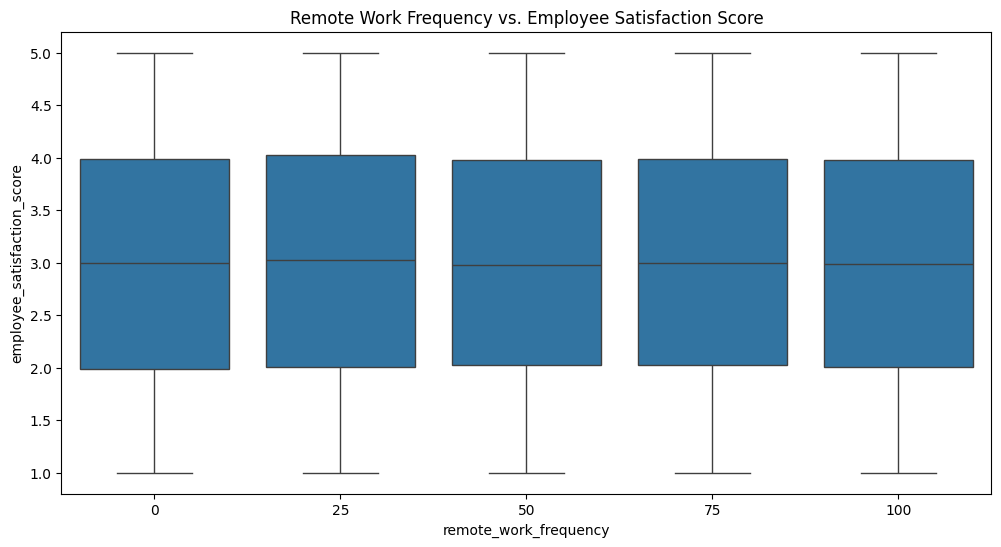

In [268]:
# Scatter plot for Remote Work Frequency vs. Employee Satisfaction Score
plt.figure(figsize=(12, 6))
sns.boxplot(data=filtered_data, x='remote_work_frequency', y='employee_satisfaction_score')
plt.title('Remote Work Frequency vs. Employee Satisfaction Score')
plt.show()

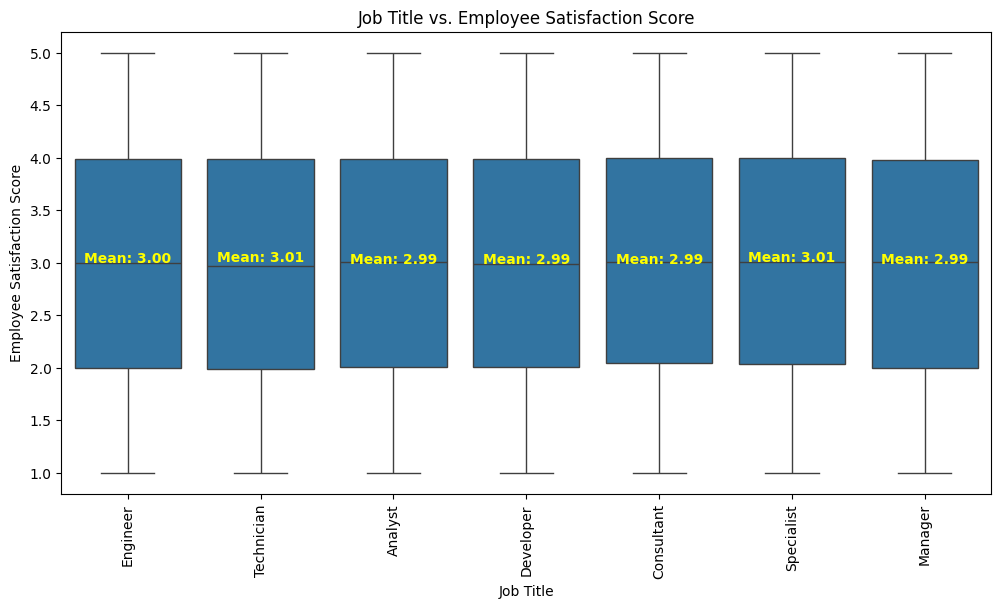

In [269]:
data2 = filtered_data.sort_values(by='department')
plt.figure(figsize=(12, 6))
sns.boxplot(data=data2, x='job_title', y='employee_satisfaction_score')

# Calculate the mean and median for each Job_Title
mean_values = data2.groupby('job_title')['employee_satisfaction_score'].mean()
# Add mean and median lines
for i, job_title in enumerate(mean_values.index):
    plt.text(i, mean_values[job_title], f'Mean: {mean_values[job_title]:.2f}', 
             horizontalalignment='center', color='yellow', weight='bold')
    
plt.title('Job Title vs. Employee Satisfaction Score')
plt.xticks(rotation=90)
plt.ylabel('Employee Satisfaction Score')
plt.xlabel('Job Title')
plt.show()

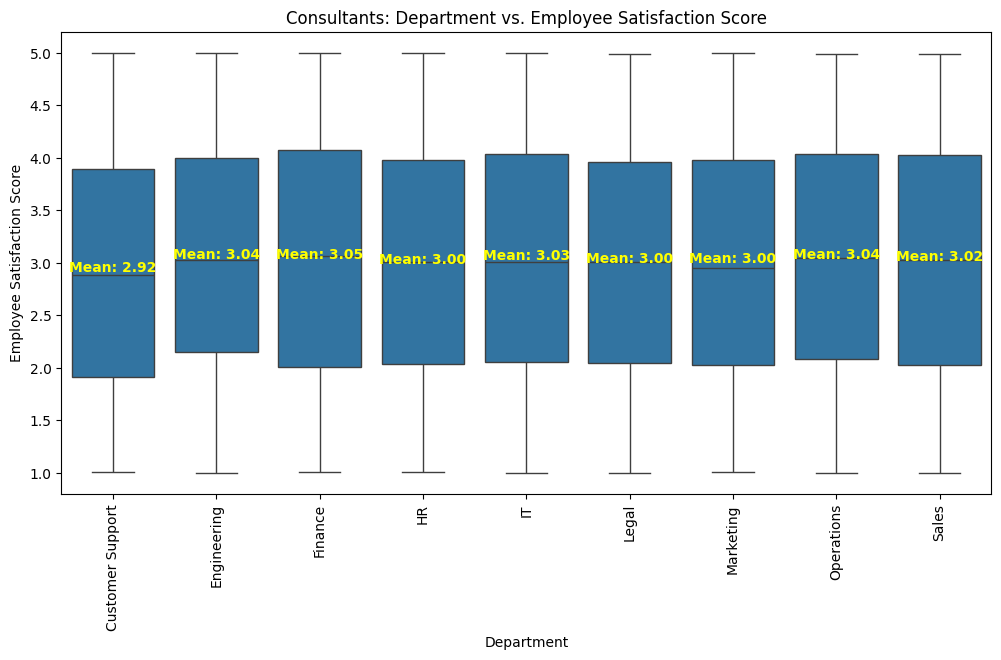

In [270]:
consulting_data2 = consulting_data.sort_values(by='department')
plt.figure(figsize=(12, 6))
sns.boxplot(data=consulting_data2, x='department', y='employee_satisfaction_score')

# Calculate the mean and median for each department
mean_values = consulting_data2.groupby('department')['employee_satisfaction_score'].mean()
median_values = consulting_data2.groupby('department')['employee_satisfaction_score'].median()

# Add mean and median lines
for i, department in enumerate(mean_values.index):
    plt.text(i, mean_values[department], f'Mean: {mean_values[department]:.2f}', 
             horizontalalignment='center', color='yellow', weight='bold')
    # plt.text(i, median_values[department], f'Median: {median_values[department]:.2f}', 
    #          horizontalalignment='center', color='orange', weight='bold')

plt.title('Consultants: Department vs. Employee Satisfaction Score')
plt.xticks(rotation=90)
plt.ylabel('Employee Satisfaction Score')
plt.xlabel('Department')
plt.show()

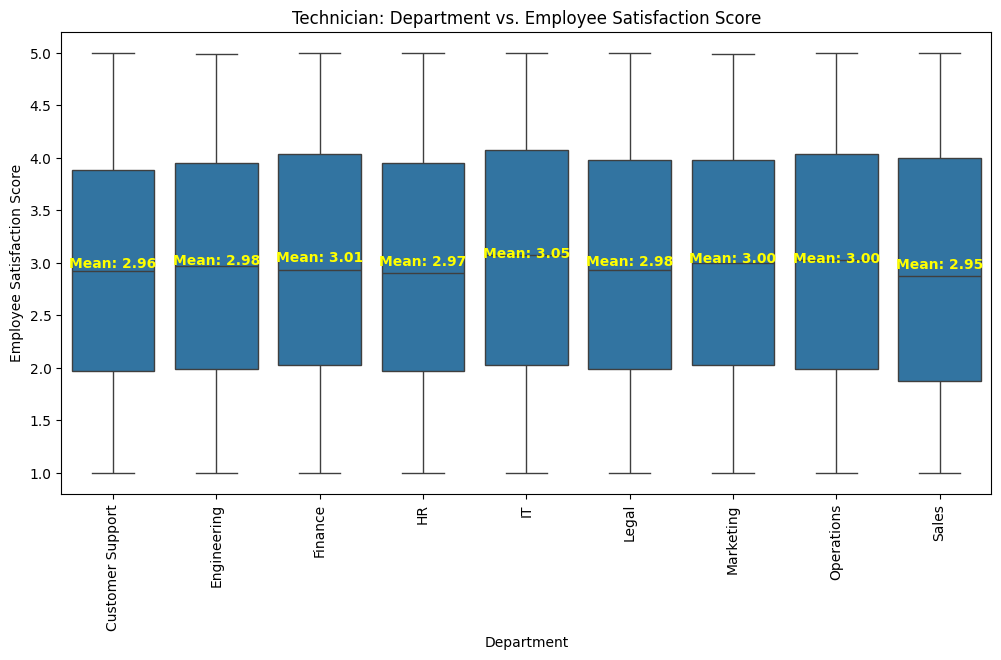

In [271]:
tech_data2 = tech_data.sort_values(by='department')
plt.figure(figsize=(12, 6))
sns.boxplot(data=tech_data2, x='department', y='employee_satisfaction_score')

# Calculate the mean and median for each department
mean_values = tech_data2.groupby('department')['employee_satisfaction_score'].mean()
#median_values = analyst_data2.groupby('department')['employee_satisfaction_score'].median()

for i, department in enumerate(mean_values.index):
    plt.text(i, mean_values[department], f'Mean: {mean_values[department]:.2f}', 
             horizontalalignment='center', color='yellow', weight='bold')
    # plt.text(i, median_values[department], f'Median: {median_values[department]:.2f}', 
    #          horizontalalignment='center', color='orange', weight='bold')

plt.title('Technicians: Department vs. Employee Satisfaction Score')
plt.xticks(rotation=90)
plt.ylabel('Employee Satisfaction Score')
plt.xlabel('Department')
plt.show()

#### Conclusions

After a quick inital look into the data with the goal of improving employee satisfaction scores in mind, I would suggest the following:
- (highest satisfaction score) Talk to the consulting employees and ask what they consider to be factors in their satisfaction scores
- (lowest satisfaction score) Talk to the technicians about what factors into their satisfaction score
- Each department and each title within the department have different jobs and purposes so it would be helpful to have more personalized performance scores and what went into the determination of the score



Takeaways:
- The data was pretty consistent all the way through, pretty evenly distributed
- There is not a clear relationship between a low satisfaction score and any of the other columns i.e the data that was provided did not show a clear reason as to why an employee would give a low satisfaction score just based on the data provided